# **Problem Statement**  
## **33. Use shap to interpret black-box model predictions.**

Use SHAP (SHapley Additive exPlanations) to interpret predictions made by a black-box machine learning model.

The objective is to:
- Explain individual predictions
- Understand global feature importance
- Interpret how each feature contributes to model outputs

### Constraints & Example Inputs/Outputs

### Constraints
- SHAP can be computationally expensive
- Requires a trained model
- Different explainers work better for different model types
- Input data must match training features

### Example Input:
```python
Model: RandomForestClassifier
Dataset: Tabular classification dataset
Features: Numerical

```

Expected Output:
```python
• SHAP summary plot
• Feature contribution for individual prediction
• Global feature importance

```

### Solution Approach

**Step 1: Train a Black-Box Model**
- We first train a model that is hard to interpret directly (e.g., Random Forest).

**Step 2: Choose SHAP Explainer**
- KernelExplainer → Model-agnostic (Brute force)
- TreeExplainer → Optimized for tree-based models

**Step 3: Compute SHAP Values**
- SHAP assigns each feature a contribution score toward the final prediction.

**Step 4: Visualize Explanations**
- Global explanations → summary plot
- Local explanations → force plot / bar plot

### Solution Code

In [2]:
!pip3 install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 42.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 49.4 MB/s  0:00:01 eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [shap]━━━━━━ 3/4 [shap]]te]


In [3]:
# Approach 1: Brute Force: Model-Agnostic SHAP (KernelExplainer)

# Import Dependencies
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load Dataset & Train Model
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Shap KernelExplainer
explainer_kernel = shap.KernelExplainer(
    model.predict_proba,
    shap.sample(X_train, 50)
)

shap_values_kernel = explainer_kernel.shap_values(
    X_test.iloc[:10]
)


  0%|          | 0/10 [00:00<?, ?it/s]

### Alternative Solution

In [4]:
# Approach 2: Tree-Based SHAP (TreeExplainer)
explainer_tree = shap.TreeExplainer(model)
shap_values_tree = explainer_tree.shap_values(X_test)


### Alternative Approaches

**Brute Force**
- SHAP KernelExplainer
- Permutation Importance

**Optimized**
- SHAP TreeExplainer ✅
- SHAP DeepExplainer (Neural Networks)
- LIME (Local explanations)

### Test Case

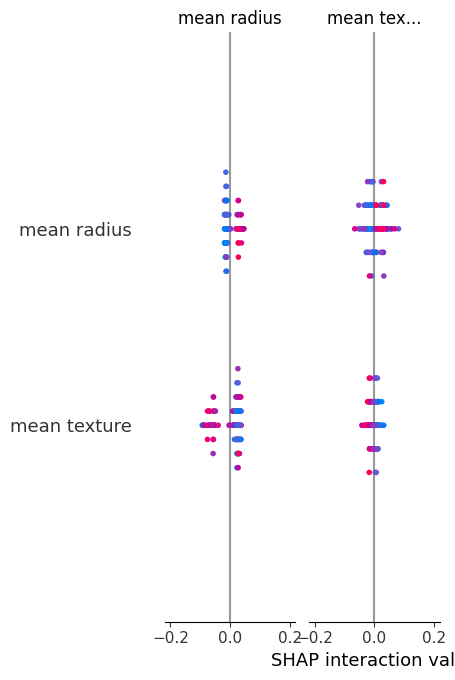

In [10]:
# Test Case 1: Global Feature Importance (Summary Plot)
shap.summary_plot(
    shap_values_tree,
    X_test
)


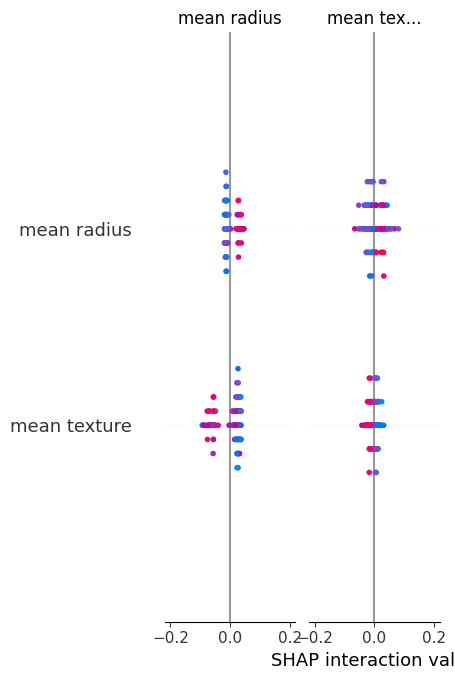

In [11]:
# Test Case 2: Bar Plot (Global Importance)

shap.summary_plot(
    shap_values_tree,
    X_test,
    plot_type="bar"
)


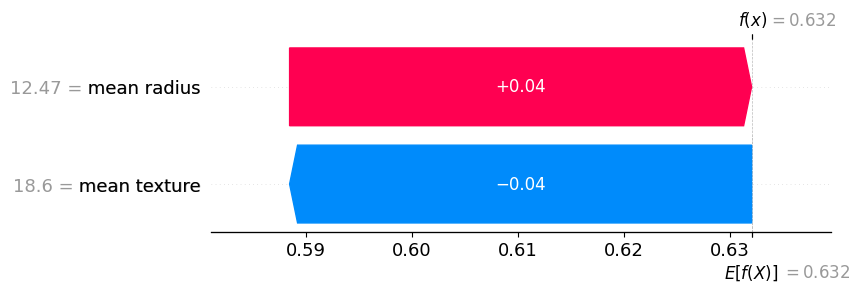

In [8]:
# Test Case 3: Local Explanation for One Prediction
sample_index = 0

shap.waterfall_plot(
    shap.Explanation(
        values=shap_values_tree[1][sample_index],
        base_values=explainer_tree.expected_value[1],
        data=X_test.iloc[sample_index],
        feature_names=X_test.columns
    )
)


In [9]:
# Test Case 4: Compare Predictions vs SHAP Sum
pred_prob = model.predict_proba(X_test.iloc[[0]])[0][1]

shap_sum = (
    explainer_tree.expected_value[1] +
    shap_values_tree[1][0].sum()
)

pred_prob, shap_sum


(np.float64(0.97), np.float64(0.6320659340659341))

### Expected Outputs
- Summary plot showing most influential features
- Individual prediction explanations
- SHAP values summing to model output
- Clear distinction between positive & negative feature impact

## Complexity Analysis

### KernelExplainer
- Time: O(n × m × 2^m)
- Space: O(n × m)

### TreeExplainer
- Time: O(n × trees × depth)
- Space: O(n × m)

#### Thank You!!